In [9]:
!pip install pandas
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
!pip install tensorflow 
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install flask

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install keras
import keras as k

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
dataset=pd.read_excel("Crude Oil Prices Daily.xlsx")

In [16]:
dataset.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [17]:
dataset.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [18]:
dataset.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [19]:
dataset.dropna(axis=0,inplace=True)

In [20]:
dataset.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [21]:
dataoil=dataset.reset_index()['Closing Value']
dataoil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
dataoil=scaler.fit_transform(np.array(dataoil).reshape(-1,1))
dataoil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

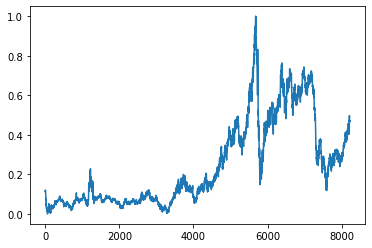

In [23]:
plt.plot(dataoil)

In [24]:
training_size=int(len(dataoil)*0.65)
test_size=len(dataoil)-training_size
train_data,test_data=dataoil[0:training_size,:],dataoil[training_size:len(dataoil),:1]

In [25]:
training_size,test_size

(5340, 2876)

In [26]:
train_data.shape

(5340, 1)

In [27]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        return np.array(dataX),np.array(dataY)

In [28]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [29]:
print(x_train.shape),print(y_train.shape)

(1, 10)
(1,)


(None, None)

In [30]:
print(x_test.shape),print(y_test.shape)

(1, 10)
(1,)


(None, None)

In [31]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, 0.11550422, 0.1156523 ,
        0.11683696, 0.1140234 , 0.10980305, 0.1089886 , 0.11054346]])

In [32]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# MODEL BUILDING

## IMPORTING MODEL BUILDING LIBRARIES

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_absolute_error

## INITIALIZING THE MODEL

In [34]:
model=Sequential()

## ADDING LSTM LAYERS 

In [35]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))


## adding output layers

In [36]:
model.add(Dense(1))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


## configure the learning process 

In [38]:
model.compile(loss='mean_squared_error',optimizer='adam')

## train the model

In [39]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 0.0095 - val_loss: 0.0909
Epoch 2/50
1/1 [==============================] - 0s 100ms/step - loss: 0.0061 - val_loss: 0.0716
Epoch 3/50
1/1 [==============================] - 0s 79ms/step - loss: 0.0032 - val_loss: 0.0534
Epoch 4/50
1/1 [==============================] - 0s 70ms/step - loss: 0.0012 - val_loss: 0.0365
Epoch 5/50
1/1 [==============================] - 0s 76ms/step - loss: 8.2316e-05 - val_loss: 0.0226
Epoch 6/50
1/1 [==============================] - 0s 66ms/step - loss: 2.6541e-04 - val_loss: 0.0146
Epoch 7/50
1/1 [==============================] - 0s 95ms/step - loss: 0.0012 - val_loss: 0.0125
Epoch 8/50
1/1 [==============================] - 0s 103ms/step - loss: 0.0017 - val_loss: 0.0139
Epoch 9/50
1/1 [==============================] - 0s 102ms/step - loss: 0.0014 - val_loss: 0.0175
Epoch 10/50
1/1 [==============================] - 0s 71ms/step - loss: 8.3524e-04 - val_loss: 0.0225
Epoch 11/50
1/1 

## Model Evaluation

In [40]:
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(x_train, y_train, epochs = 20, batch_size = 15,validation_data=(x_test, y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
1/1 [==============================] - 15s 15s/step - loss: 0.0109 - val_loss: 0.1048 - lr: 0.0010
Epoch 2/20
1/1 [==============================] - 0s 49ms/step - loss: 0.0072 - val_loss: 0.0865 - lr: 0.0010
Epoch 3/20
1/1 [==============================] - 0s 45ms/step - loss: 0.0041 - val_loss: 0.0690 - lr: 0.0010
Epoch 4/20
1/1 [==============================] - 0s 48ms/step - loss: 0.0017 - val_loss: 0.0523 - lr: 0.0010
Epoch 5/20
1/1 [==============================] - 0s 66ms/step - loss: 1.7547e-04 - val_loss: 0.0375 - lr: 0.0010
Epoch 6/20
1/1 [==============================] - 0s 49ms/step - loss: 1.1413e-04 - val_loss: 0.0271 - lr: 0.0010
Epoch 7/20
1/1 [==============================] - 0s 48ms/step - loss: 1.2154e-04 - val_loss: 0.0204 - lr: 0.0010
Epoch 8/20
1/1 [==============================] - 0s 49ms/step - loss: 0.0020 - val_loss: 0.0202 - lr: 0.0010
Epoch 9/20
1/1 [==============================] - 0s 46ms/step - loss: 3.7429e-04 - val_loss: 0.0215 - lr: 0

In [41]:
train_predict = regressor.predict(x_train)
test_predict = regressor.predict(x_test)


1/1 [==============================] - 0s 20ms/step


In [42]:
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [43]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.3431420135498051

In [44]:
from tensorflow.keras.models import load_model
model.save("crude_oil.h5")

In [45]:
look_back=10
trainPredictPlot=np.empty_like(dataoil)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testPredictPlot=np.empty_like(dataoil)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataoil)-1,:]=test_predict

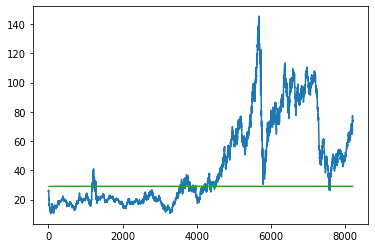

In [46]:
plt.plot(scaler.inverse_transform(dataoil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [47]:
len(test_data)

2876

In [48]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [49]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [50]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [51]:
lst_output=[]
n_steps=10
i=0 
while(i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.17525661]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.17525661]
1 day output [[0.17483878]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.17525661 0.17483878]
2 day output [[0.17196193]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.17525661 0.17483878 0.17196193]
3 day output [[0.16714796]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.17525661 0.17483878 0.17196193 0.16714796]
4 day output [[0.16161186]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.17525661
 0.17483878 0.17196193 0.16714796 0.16161186]
5 day output [[0.15482593]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.17525661 0.17483878
 0.17196193 0.16714796 0.16161186 0.15482593]
6 day output [[0.14727062]]
7 day input [0.46497853 0.47038353 0.47149415 0.17525661 0.1748387

In [52]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)
len(dataoil)


8216

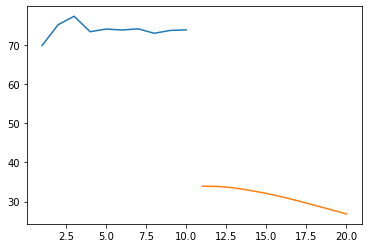

In [53]:
plt.plot(day_new,scaler.inverse_transform(dataoil[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

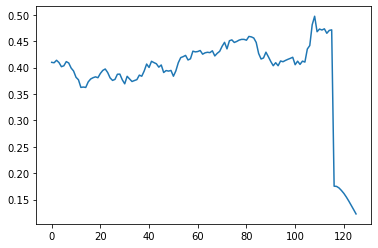

In [54]:
df3=dataoil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

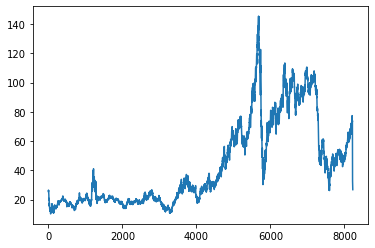

In [55]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)